#### Problem Statement/Hypothesis: The ability to predict the prices of one's home value is not only beneficial on the individual level, but on a larger economic scale. There are several factors that may influence the price of one's home and value. I believe that there is a direct relationship, and one of the most important factors to consider, between paying a higher price for property when the size of the property being sold is larger. I believe that the larger the Lot Frontage, the width of a lot of property, the higher the selling price of the property.

In [131]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import graphlab
import statsmodels.api as sm

In [132]:
data = pd.read_csv('../traindataforproject.csv')

In [133]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [135]:
data["LotFrontage"].value_counts(dropna=False)
#Number of homes without lot frontage and those that have, the number of linear feet of street connected to property

NaN       259
 60.0     143
 70.0      70
 80.0      69
 50.0      57
 75.0      53
 65.0      44
 85.0      40
 78.0      25
 21.0      23
 90.0      23
 68.0      19
 24.0      19
 64.0      19
 73.0      18
 72.0      17
 79.0      17
 63.0      17
 55.0      17
 100.0     16
 51.0      15
 66.0      15
 74.0      15
 52.0      14
 59.0      13
 71.0      12
 67.0      12
 57.0      12
 82.0      12
 43.0      12
         ... 
 129.0      2
 313.0      2
 118.0      2
 122.0      2
 121.0      2
 101.0      2
 109.0      2
 115.0      2
 116.0      2
 114.0      2
 153.0      1
 149.0      1
 150.0      1
 111.0      1
 182.0      1
 46.0       1
 112.0      1
 141.0      1
 33.0       1
 152.0      1
 160.0      1
 168.0      1
 128.0      1
 144.0      1
 39.0       1
 106.0      1
 38.0       1
 138.0      1
 140.0      1
 137.0      1
Name: LotFrontage, dtype: int64

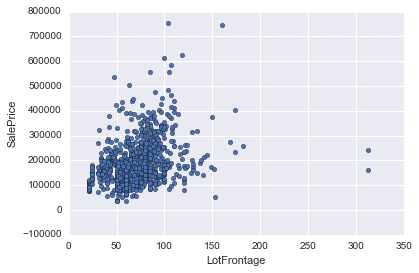

In [136]:
data.plot.scatter(x='LotFrontage', y='SalePrice')

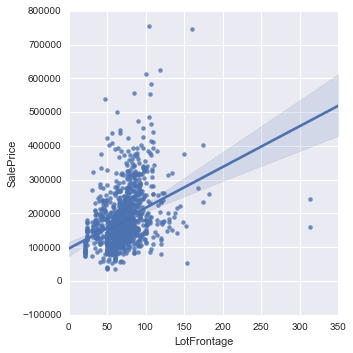

In [137]:
lm = sns.lmplot('LotFrontage','SalePrice', data,sharex=False,sharey=False)

#### There is a realtionship that bigger houses cost more. However, most of the data points are closely related demonstrating that a lot of the houses have a lot size between 0 - 150 square feet and have the price range between 250,000 and 300,000 USD. In addition, there are several outliers causing some discrepancies.

#### Testing for skewness and the relationship between variables

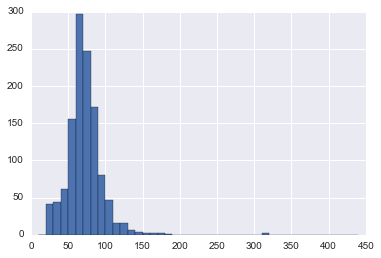

In [138]:
data['LotFrontage'].hist(bins = range(10,450,10))

In [139]:
#I will convert the variable lot area from an integer to a float to be more comparable. 
from math import log

In [140]:
data['LotArea'] = data['LotArea'].map(lambda x: 1 if x == 0 else log(x))

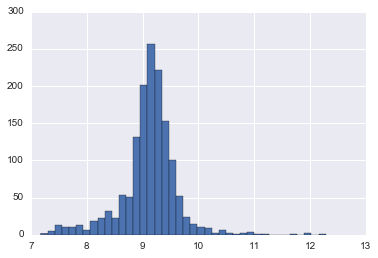

In [141]:
data['LotArea'].hist(bins = 40)

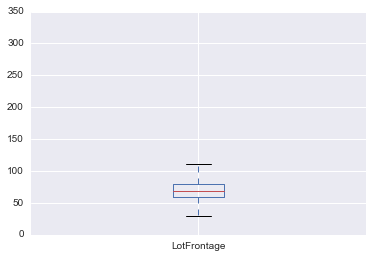

In [142]:
data.boxplot('LotFrontage')


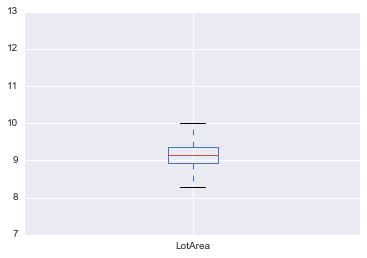

In [143]:
data.boxplot('LotArea')

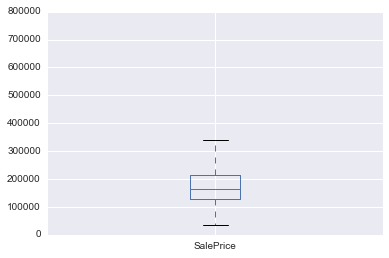

In [144]:
data.boxplot('SalePrice')

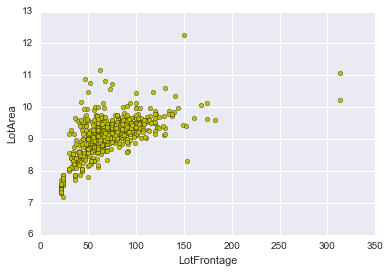

In [145]:
#compare LotFrontage and LotArea
data.plot(x = 'LotFrontage', y = 'LotArea', kind = 'scatter', color='y')

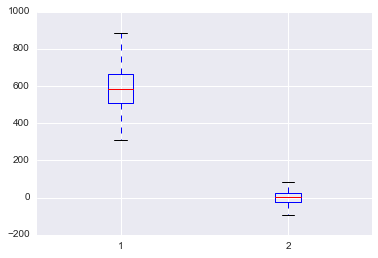

In [146]:
#compare LotFrontage and LotArea
LotFrontage = np.random.normal (588, 116, 400)
LotArea = np.random.normal (3, 38, 400)
data2 = [LotFrontage, LotArea]
plt.boxplot(data2)
plt.show()

In [147]:
data3 = {'LotFrontage': [1, 10, 100, 1000],
        'LotArea': ['1', '10','100', '1000']
        }
dataframe = pd.DataFrame(data3, columns=['LotFrontage', 'LotArea'])
dataframe

,LotFrontage,LotArea
0,1,1
1,10,10
2,100,100
3,1000,1000


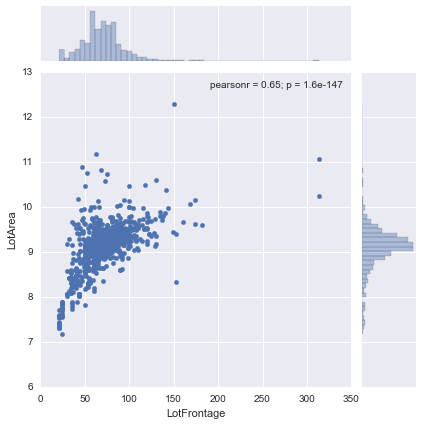

In [148]:
sns.jointplot(x = 'LotFrontage', y = 'LotArea', data = data)

#### Linear Regression and the coefficients

In [149]:
from sklearn.linear_model import LinearRegression

In [150]:
data.drop(['KitchenQual', 'FireplaceQu'], axis=1, inplace=True)

In [151]:
x = data.dropna(subset=['LotArea', 'LotFrontage', 'YearBuilt'])
X = x[['LotArea', 'LotFrontage', 'YearBuilt']]
y = x['SalePrice']


lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [152]:
from sklearn.metrics import r2_score

In [153]:
r2_score(y,lm.predict(X))
#43% of the variance are from these factors

0.43912702570213336

In [154]:
lm.coef_
#shows price for 1. LotArea, 2.LotFrontage, 3.YearBuilt

array([ 57171.82680708,    228.64521572,   1340.21786833])

##### Cross Validation

##### Now you want to do the cross validation because you used all of the data. The cross validation will limit that for more accurate results

###### Linear Regression

In [155]:
x = data.dropna(subset=['LotArea', 'LotFrontage', 'YearBuilt'])
X = x[['LotArea', 'LotFrontage', 'YearBuilt']]
y = x['SalePrice']


lm = LinearRegression()
lm.fit(X, y)

from sklearn.cross_validation import cross_val_score, KFold
cv = KFold(len(X),n_folds=2, shuffle=True)
perf = cross_val_score(lm, X, y, cv=cv)
print perf.mean(), perf.std()

0.426669923838 0.0148218809841


#### 43% Average and the standard deviation of .03

Check for outliers

In [156]:
x['LotFrontage'].describe()


count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [157]:
x['LotFrontage'].describe()
x['LotFrontage'].quantile(.95)

107.0

In [158]:
X = X[X['LotFrontage']<107]
#removed values less than 207 to refit the model

In [159]:
X = x[['LotArea', 'LotFrontage', 'YearBuilt']]
y = x['SalePrice']

lm = LinearRegression()
cv = KFold(len(X),n_folds=2, shuffle=True)
perf = cross_val_score(lm, X, y, cv=cv)
print perf.mean(), perf.std()

0.433467436477 0.00583687752343


##### Now that the outliers have been removed and I refitted the model, the mean has decreased and so has the standard deviation. Minimal impact

##### Will run a new model to see if we can make some improvements

##### Decision Tree Model

In [160]:
from sklearn.tree import DecisionTreeRegressor

In [161]:
dt = DecisionTreeRegressor(max_depth=3)
perf = cross_val_score(dt, X, y, cv=cv)
print perf.mean(), perf.std()

0.421129253403 0.0564065277461


##### This did not improve the model. So I will do a grid search to see if I can improve the model

In [162]:
from sklearn.grid_search import GridSearchCV

dt = DecisionTreeRegressor()
params = {"max_depth": [1,3,5,10],"min_samples_split": [3,5], "min_samples_leaf": [3,6],\
         "max_features": [0.4,0.6,0.9]}

grid = GridSearchCV(dt, params, n_jobs=-1, verbose=True, cv=cv)
grid.fit(X,y)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    1.5s finished


GridSearchCV(cv=sklearn.cross_validation.KFold(n=1201, n_folds=2, shuffle=True, random_state=None),
       error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5], 'max_features': [0.4, 0.6, 0.9], 'max_depth': [1, 3, 5, 10], 'min_samples_leaf': [3, 6]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=True)

##### Hyperparameters for this best model

In [163]:
print grid.best_params_
print grid.best_score_

{'max_features': 0.4, 'min_samples_split': 3, 'max_depth': 5, 'min_samples_leaf': 3}
0.484293491619


##### Withing the 2 fold cross validation, the grid search indictes that this is the best combination returning an average accuracy score of 46

##### Calculate the residuals using the best of this model

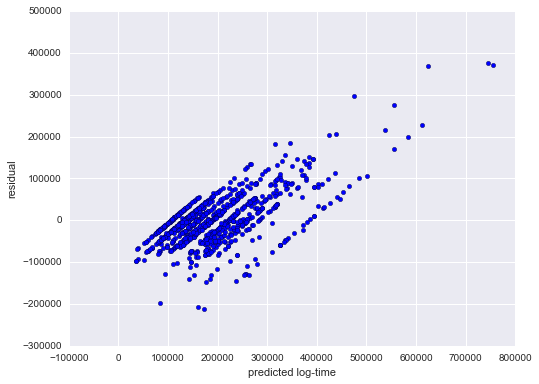

In [164]:
resid = y - grid.best_estimator_.predict(X)

fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(x=y,y=resid)
ax.set_xlabel("predicted log-time")
ax.set_ylabel("residual")

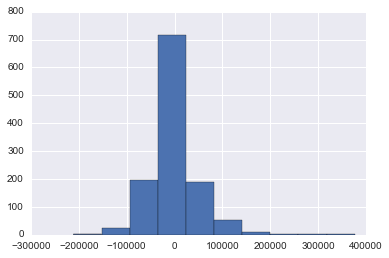

In [165]:
resid.hist()

##### For the most part, this has a normal distribution, with a small outlier. The residual shows dependency

In [166]:
#creating a new target variable by spliting LotFrontage by the median
print np.median(X["LotFrontage"])
X["LotFrontage"] = X["LotFrontage"].map(lambda x: 0 if x>=np.median(X["LotFrontage"]) else 1)

69.0


/Users/KamarriCummings/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [167]:
x["LotFrontage"].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
        ... 
129.0      2
124.0      2
118.0      2
101.0      2
122.0      2
121.0      2
115.0      2
109.0      2
116.0      2
114.0      2
150.0      1
111.0      1
153.0      1
182.0      1
46.0       1
112.0      1
149.0      1
141.0      1
33.0       1
152.0      1
160.0      1
168.0      1
128.0      1
144.0      1
39.0       1
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, dtype: int64

##### Logistic Regression for a better test

In [168]:
from sklearn.cross_validation import StratifiedKFold
cv_class = StratifiedKFold(y,n_folds=5,shuffle=True, random_state=4)
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [169]:
#Cross Validation
perf = cross_val_score(dt, X, y, cv=cv)
print perf.mean(), perf.std()

0.175330146439 0.104757217171


In [170]:
len(X[X['LotFrontage']==1])/len(X)

0

In [171]:
perf = cross_val_score(lg, X, y, cv=cv, scoring="accuracy")
print perf.mean(), perf.std()

0.00999029395452 0.00165696062119


##### Logistic Regression model is not good at all. It predicts an accuracy of <1% as compared to the baseline of 0

##### K Nearest Neighbors

In [172]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X,y)
perf = cross_val_score(knn, X, y, cv=cv)
print perf.mean(), perf.std()

0.00915557404326 0.00415557404326


In [173]:
knn = KNeighborsClassifier()
params = {'n_neighbors': range(2,20,2)}

knn_grid = GridSearchCV(knn, params, n_jobs=-1, verbose=True, cv=cv)
knn_grid.fit(X,y)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.8s finished


GridSearchCV(cv=sklearn.cross_validation.KFold(n=1201, n_folds=2, shuffle=True, random_state=None),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=True)

In [174]:
print knn_grid.best_score_
print knn_grid.best_params_

0.0124895920067
{'n_neighbors': 2}


##### No performance difference

##### Decision Tree

In [175]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [176]:
perf = cross_val_score(dt, X, y, cv=cv)
print perf.mean(), perf.std()

0.0108236272879 0.000823627287854


In [177]:
dt = DecisionTreeClassifier()
params = {'max_depth': [3,5,7,10,20],'max_features':[0.1, 0.3, 0.7, 1], \
         "min_samples_split":[2,3,5]}

dt_grid = GridSearchCV(dt, params, n_jobs=-1, verbose=True, cv=cv)
dt_grid.fit(X,y)

Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.9s finished


GridSearchCV(cv=sklearn.cross_validation.KFold(n=1201, n_folds=2, shuffle=True, random_state=None),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [0.1, 0.3, 0.7, 1], 'min_samples_split': [2, 3, 5], 'max_depth': [3, 5, 7, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=True)

In [178]:
print dt_grid.best_estimator_
print dt_grid.best_score_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=0.7, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
0.014987510408


##### No better performance 1.2 vs. 1.1

##### For the best model, I will use the train/test split for precision, recall scoes and accuracy

### Summary

- The unexplained variances denonstrate that the mean might not be the most suitable indicator.
- The strength of my modeling approach shows how much seperation there is between all of the models. There is a clear   weakness that maybe I could have used a better dataset or possibly worked on cleaning it up more.
- I decided to use these metrics to do some testing and experiementing to prove my hypothesis.
- I would like to have new data, preferably already cleaned and not missing,  availible for several variables, in      particular LotArea.